# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from WhatisLife import Rotator

In [2]:
#%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

In [3]:
def ScreamExtractor(File):
    FILENAME = pd.read_csv(f'{File}.csv', sep=',', comment='#')
    return FILENAME

In [54]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
PlanetFile = 'Sorted Data/Planets/HoVan All Planets'
StarFile = 'Sorted Data/Stars/BASTA All Stars'
PlanetData = ScreamExtractor(f'{Directory}/{PlanetFile}')
StarData = ScreamExtractor(f'{Directory}/{StarFile}')

In [55]:
Object = StarData
for f in range(len(Object)):
    if str(Object['Radius'][f]) == 'nan':
        StarData = StarData.drop(f)
Object = PlanetData
for f in range(len(Object)):
    if str(Object['Host Gaia DR3 ID'][f]) == 'nan':
        PlanetData = PlanetData.drop(f)

In [56]:
SourceID = StarData['Gaia DR3 ID'].astype(float)
StellarRadius = StarData['Radius'] #Solar Radius
PlanetID = PlanetData['Host Gaia DR3 ID']
OrbitalPeriod = PlanetData['P'] #Days
Ratio = PlanetData['PSR'] #%

In [57]:
OrbitalPeriodList = []
PlanetRadius = []
for n in range(len(PlanetID)):
    try:
        Index = StarData.loc[StarData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        OrbitalPeriodList.append(OrbitalPeriod[n])
        Radius = Ratio[n]*StellarRadius[Index]*const.R_sun/const.R_earth
        PlanetRadius.append(Radius)
    except:
        continue

In [58]:
def Gradienter(XAxis, YAxis, m, X=10):
    NewX = np.linspace(10, 10, len(XAxis))
    NewY = 10**(m*(X-XAxis)+YAxis)
    return NewX, NewY

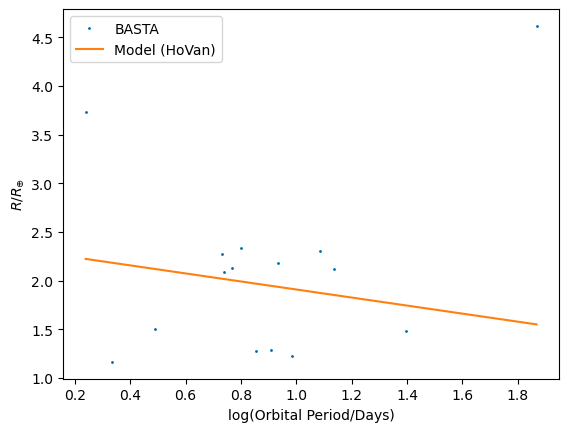

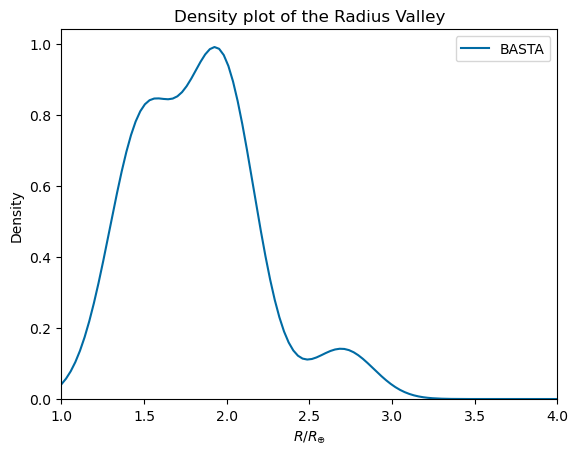

In [59]:
# m = -0.11+-0.02, c = 0.37+0.02-0.03

OP = np.log10(np.array(OrbitalPeriodList))
PR = np.log10(np.array(PlanetRadius))
Gradient = np.linspace(-0.096, -0.096, 1)

X, Y = Gradienter(OP, PR, Gradient[0])

x = np.linspace(min(OP), max(OP), 2)
y = -0.096*x + 0.37

plt.figure()
plt.plot(OP, 10**PR, '.', markersize=2, label='BASTA')
plt.plot(x, 10**y, label='Model (HoVan)')
plt.xlabel('log(Orbital Period/Days)')
plt.ylabel('$R/R_{\oplus}$')
plt.legend()
plt.show()

Title = 'Density plot of the Radius Valley'
KDE = sns.kdeplot(10**Y, bw_adjust=0.3, label='BASTA')
plt.xlabel('$R/R_{\oplus}$')
plt.xlim(1, 4)
plt.title(Title)
plt.legend()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

In [10]:
x = np.linspace(min(OrbitalPeriodList), max(OrbitalPeriodList), 2)
m = -0.11
c1 = 0.37
y1 = 10**(m*np.log10(x) + c1)

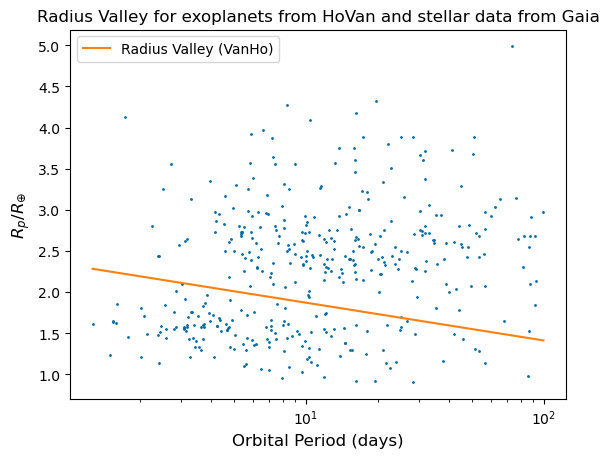

In [11]:
plt.figure()
plt.plot(OrbitalPeriodList, PlanetRadius, '.', markersize=2)
plt.plot(x, y1, label='Radius Valley (VanHo)')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from HoVan and stellar data from Gaia', fontsize=12)
plt.xscale('log')
plt.legend()
plt.show()

You tatty git